## Singapore Rainfall data for the location (1.30◦N,103.68◦E), collected in year 2010 from ground-based sky imager.
Exploratory analysis - Initial Ploting and Data Parsing.

In [23]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import xarray as xr
import seaborn as sns # for density plots
# from datetime import datetime
style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (14,5) # For Increasing Size of graph

In [2]:
# Dataframe for IMAGER data
rainfall_df = pd.read_csv("data/imagerdata.csv", header=None, names=["day", "hour", "minute", "rainfall_rate"])
# precip_dataset = xr.open_dataset('data/chirps-2010.nc') # open the dataset using xarray
# # Gauge Station Data
# jan_gauge_df = pd.read_csv('data/gauge_data.csv', encoding= 'unicode_escape', header=0, usecols=[1,2,3,4], names=['year', 'month', 'day', 'rainfall'])

### Parsing the Gauge Station Data for JANUARY 2010

In [3]:
# jan_gauge_df['date']=pd.to_datetime(jan_gauge_df['day'], unit='D', origin=pd.Timestamp('2009-12-31')) # Using day number to create the date

### Parsing the CHIRPS dataset for JANUARY 2010

In [4]:
# Dataframe for CHIRPS Dataset
# precip_df = precip_dataset['precip'].sel(time=slice('2010-01-01T00:0','2010-01-31T00:0'), longitude=103.67499, latitude=1.324997).to_dataframe()

### Parsing the IMAGER dataset

In [5]:
# Parsing the Dates
rainfall_df['date']=pd.to_datetime(rainfall_df['day'], unit='D', origin=pd.Timestamp('2009-12-31')) # Using day number to create the date
rainfall_df['timestamp'] = rainfall_df['date'] + pd.to_timedelta(rainfall_df['hour'].astype('str') + ':' + rainfall_df['minute'].astype('str') + ':00') # append the timedelta in hours and minutes to get the full timestamp
rainfall_df.set_index('timestamp', inplace=True)

In [20]:
sampled_df = pd.DataFrame()
sampled_df = rainfall_df.groupby(pd.Grouper(freq="M")).resample('D').sum() # Groupby MONTH and then taking the total daily sum
sampled_df.drop(['day', 'hour', 'minute'], axis=1, inplace=True) # Dropped the day, hour, minute columns
sampled_df = sampled_df.reset_index(level=0, drop=True)
display(sampled_df)

,rainfall_rate
timestamp,
2010-01-01,1080
2010-01-02,12
2010-01-03,12
2010-01-04,792
2010-01-05,0
...,...
2010-12-27,0
2010-12-28,0
2010-12-29,48


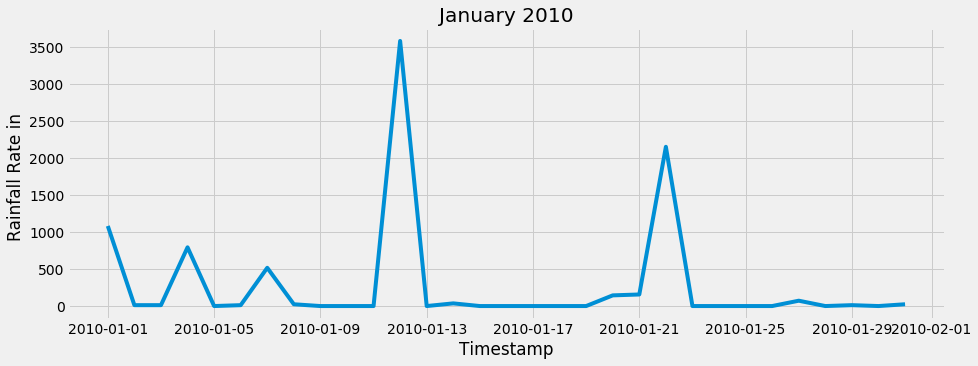

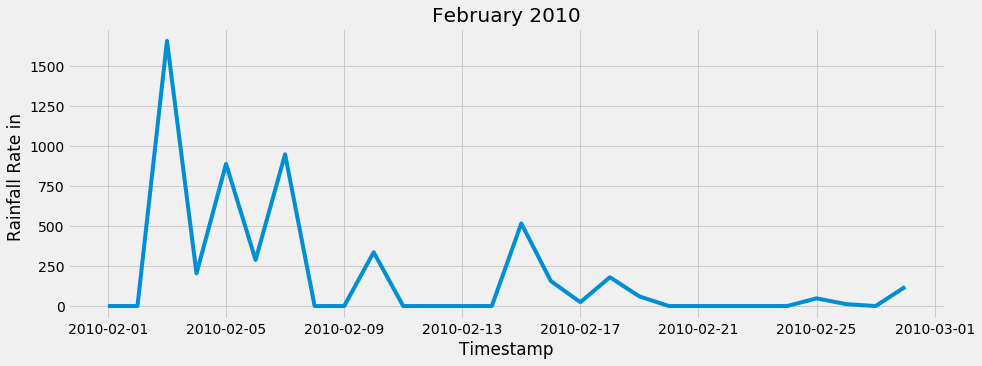

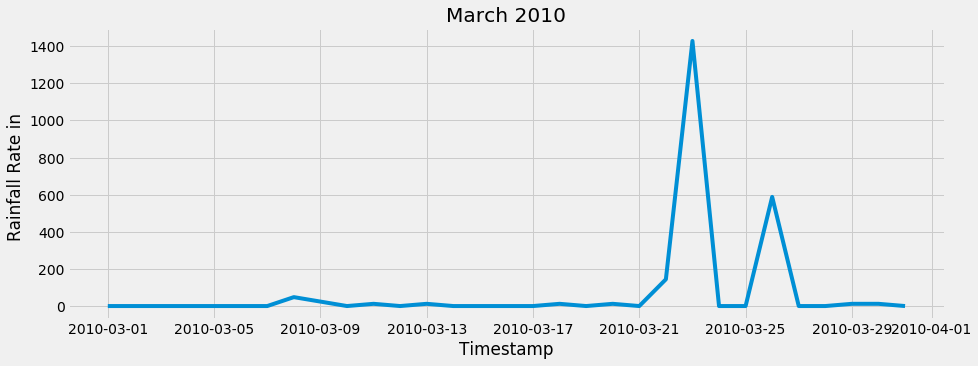

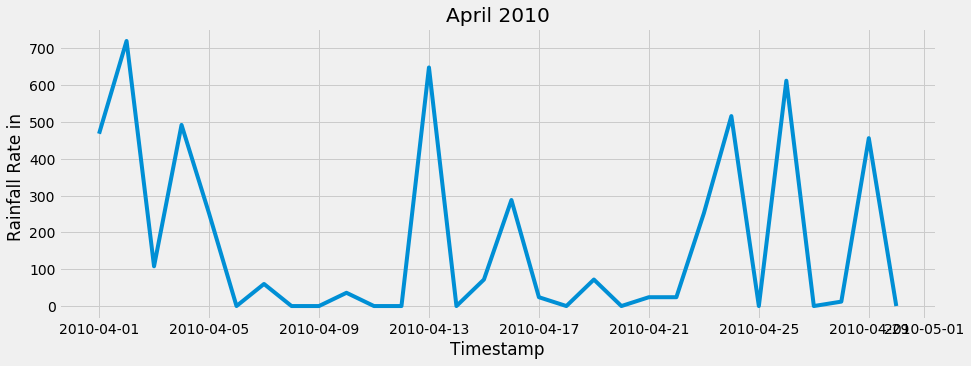

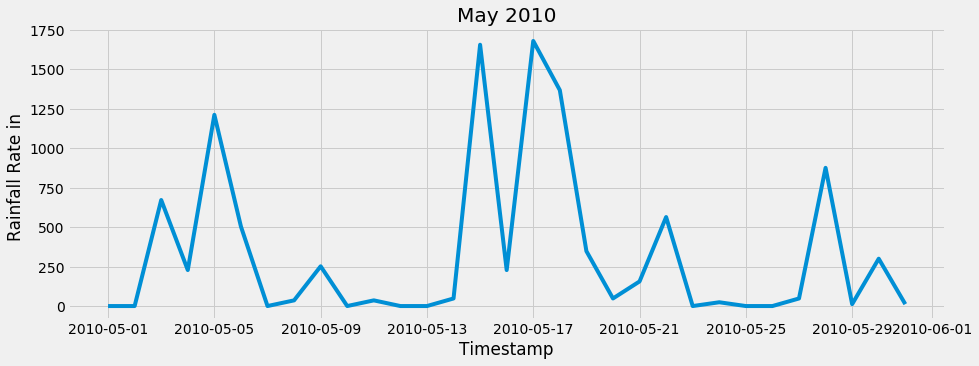

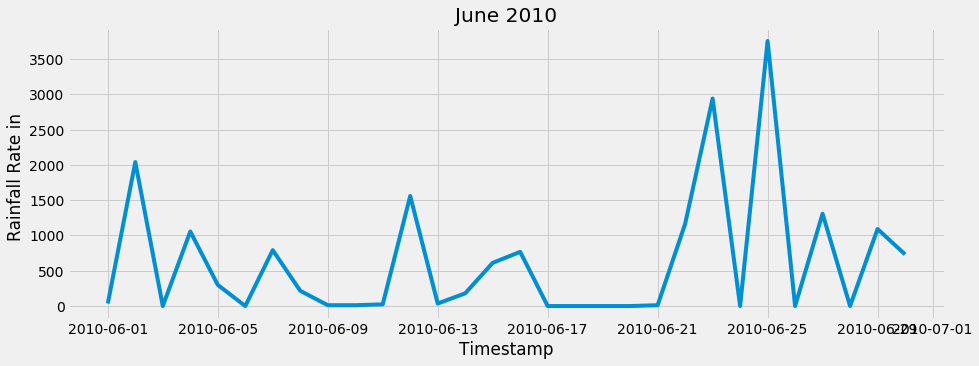

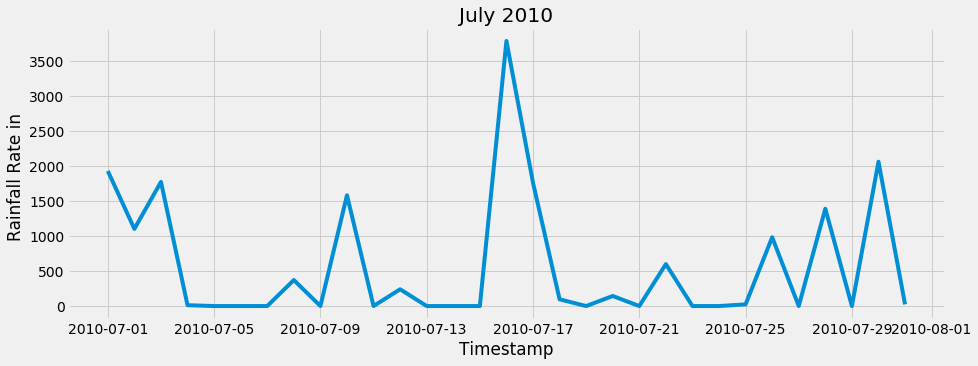

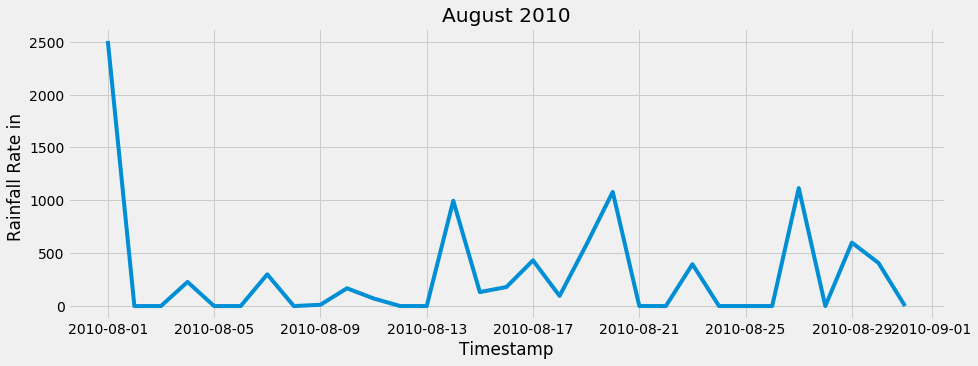

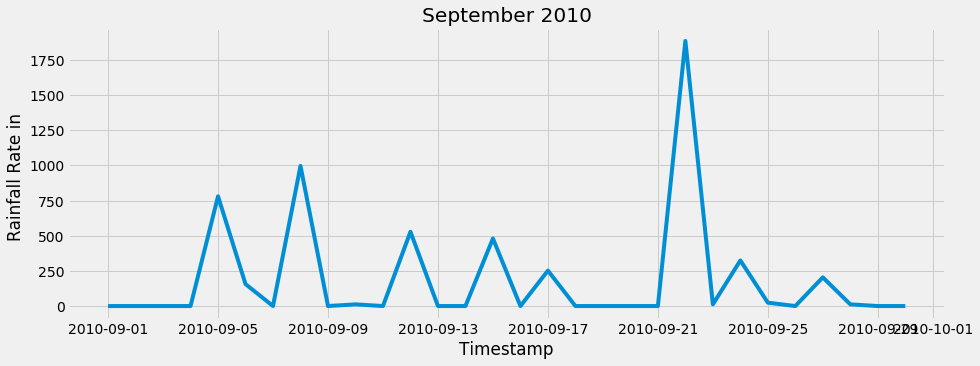

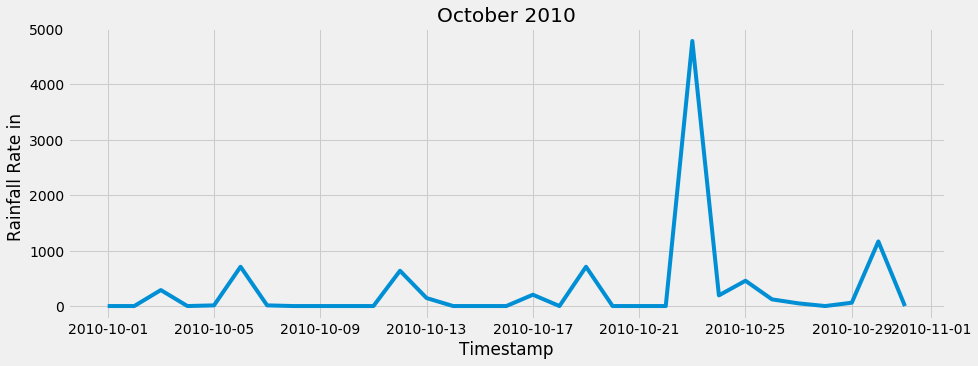

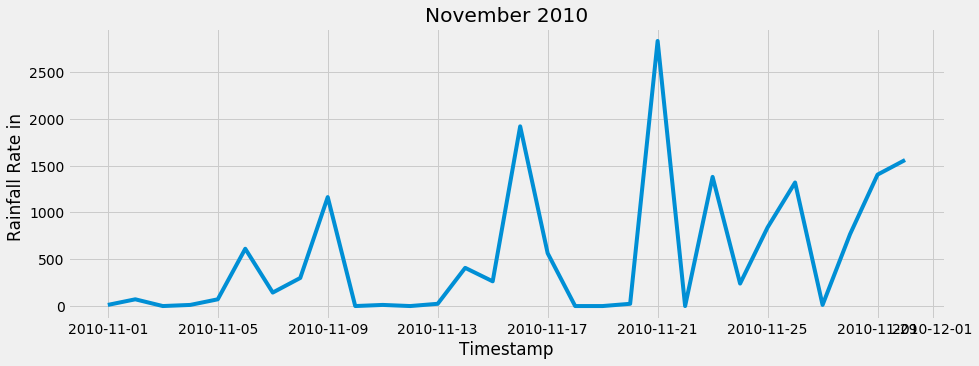

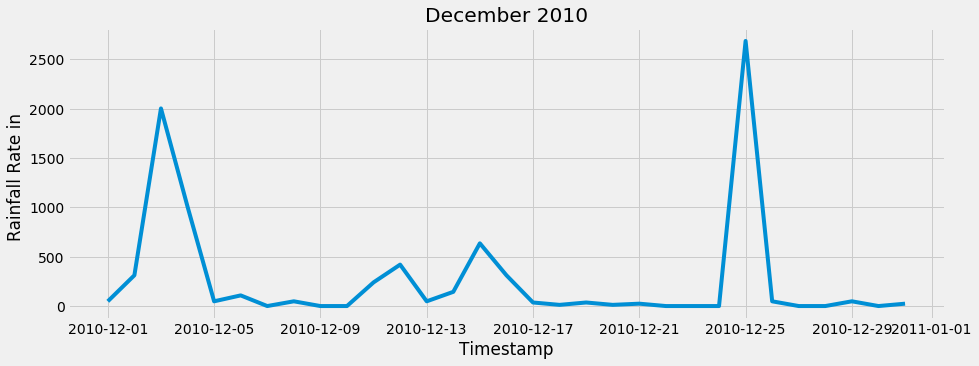

In [27]:
def plot_monthly_data():
    titles = ["January 2010", "February 2010", "March 2010", "April 2010", "May 2010", "June 2010", "July 2010", "August 2010", "September 2010", "October 2010", "November 2010", "December 2010"]
    for i in range(1, 13):
        plt.figure()
        plt.plot(sampled_df[sampled_df.index.month == i]['rainfall_rate'])
        plt.title(titles[i-1])
        plt.xlabel('Timestamp')
        plt.ylabel('Rainfall Rate in ')
        # Show/save figure as desired.
        plt.show()
plot_monthly_data()

In [9]:
sampled_df = sampled_df.reset_index(level=0, drop=True)

### Basic data analysis for the IMAGER data

In [10]:
daily_statistics_df = pd.DataFrame()
monthly_statistics_df = pd.DataFrame()
daily_statistics_df['daily_total_rate'] = rainfall_df.rainfall_rate.resample('D').sum()
daily_statistics_df['daily_mean_rate'] = rainfall_df.rainfall_rate.resample('D').mean()
monthly_statistics_df['monthly_total_rate'] = rainfall_df.rainfall_rate.resample('M').sum()
monthly_statistics_df['monthly_mean_rate'] = rainfall_df.rainfall_rate.resample('M').mean()

In [11]:
display(monthly_statistics_df)

,monthly_total_rate,monthly_mean_rate
timestamp,,
2010-01-31,8616,0.193011
2010-02-28,5436,0.134821
2010-03-31,2304,0.051613
2010-04-30,5136,0.118889
2010-05-31,10308,0.230914
2010-06-30,18648,0.431667
2010-07-31,17904,0.401075
2010-08-31,9300,0.208333
2010-09-30,5664,0.131111
